<a href="https://colab.research.google.com/github/rishi-29-02/Horse_or_human_prediction/blob/main/Horses_Humans_Convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Horse or Human Convnet Model

https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip

https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip

Unzipping the data

In [ ]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [ ]:
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip_1)
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

Defining the directories

In [ ]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [ ]:
valid_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
valid_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

['horse20-6.png', 'horse19-3.png', 'horse22-1.png', 'horse50-4.png', 'horse49-1.png', 'horse15-4.png', 'horse17-6.png', 'horse32-9.png', 'horse09-3.png', 'horse49-8.png']


In [ ]:
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['human02-21.png', 'human07-09.png', 'human01-16.png', 'human17-13.png', 'human04-01.png', 'human10-17.png', 'human13-17.png', 'human04-20.png', 'human11-22.png', 'human13-13.png']


In [ ]:
valid_horse_names = os.listdir(valid_horse_dir)
print(valid_horse_names[:10])
valid_human_names = os.listdir(valid_human_dir)
print(valid_human_names[:10])

['horse3-484.png', 'horse4-541.png', 'horse2-412.png', 'horse1-568.png', 'horse1-510.png', 'horse2-441.png', 'horse1-436.png', 'horse6-275.png', 'horse5-402.png', 'horse2-269.png']
['valhuman03-18.png', 'valhuman02-03.png', 'valhuman03-01.png', 'valhuman03-21.png', 'valhuman03-23.png', 'valhuman01-12.png', 'valhuman04-12.png', 'valhuman01-04.png', 'valhuman04-24.png', 'valhuman04-03.png']


In [ ]:
print('The total number of horse images for training : ', len(os.listdir(train_horse_dir)))
print('The total number of human images for training : ', len(os.listdir(train_human_dir)))
print('The total number of horse images for validation : ', len(os.listdir(valid_horse_dir)))
print('The total number of human images for validation : ', len(os.listdir(valid_human_dir)))

The total number of horse images for training :  500
The total number of human images for training :  527
The total number of horse images for validation :  128
The total number of human images for validation :  128


In [ ]:
categories = os.listdir('/tmp/horse-or-human')
categories

['humans', 'horses']

In [ ]:
train_path = '/tmp/horse-or-human'
train_images = []
for category in categories:
  folder = train_path + '/' + category
  train_images.append(len(os.listdir(folder)))

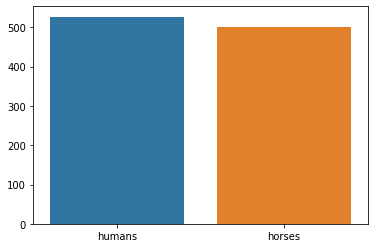

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=categories, y=train_images)
plt.show()

Plot some images

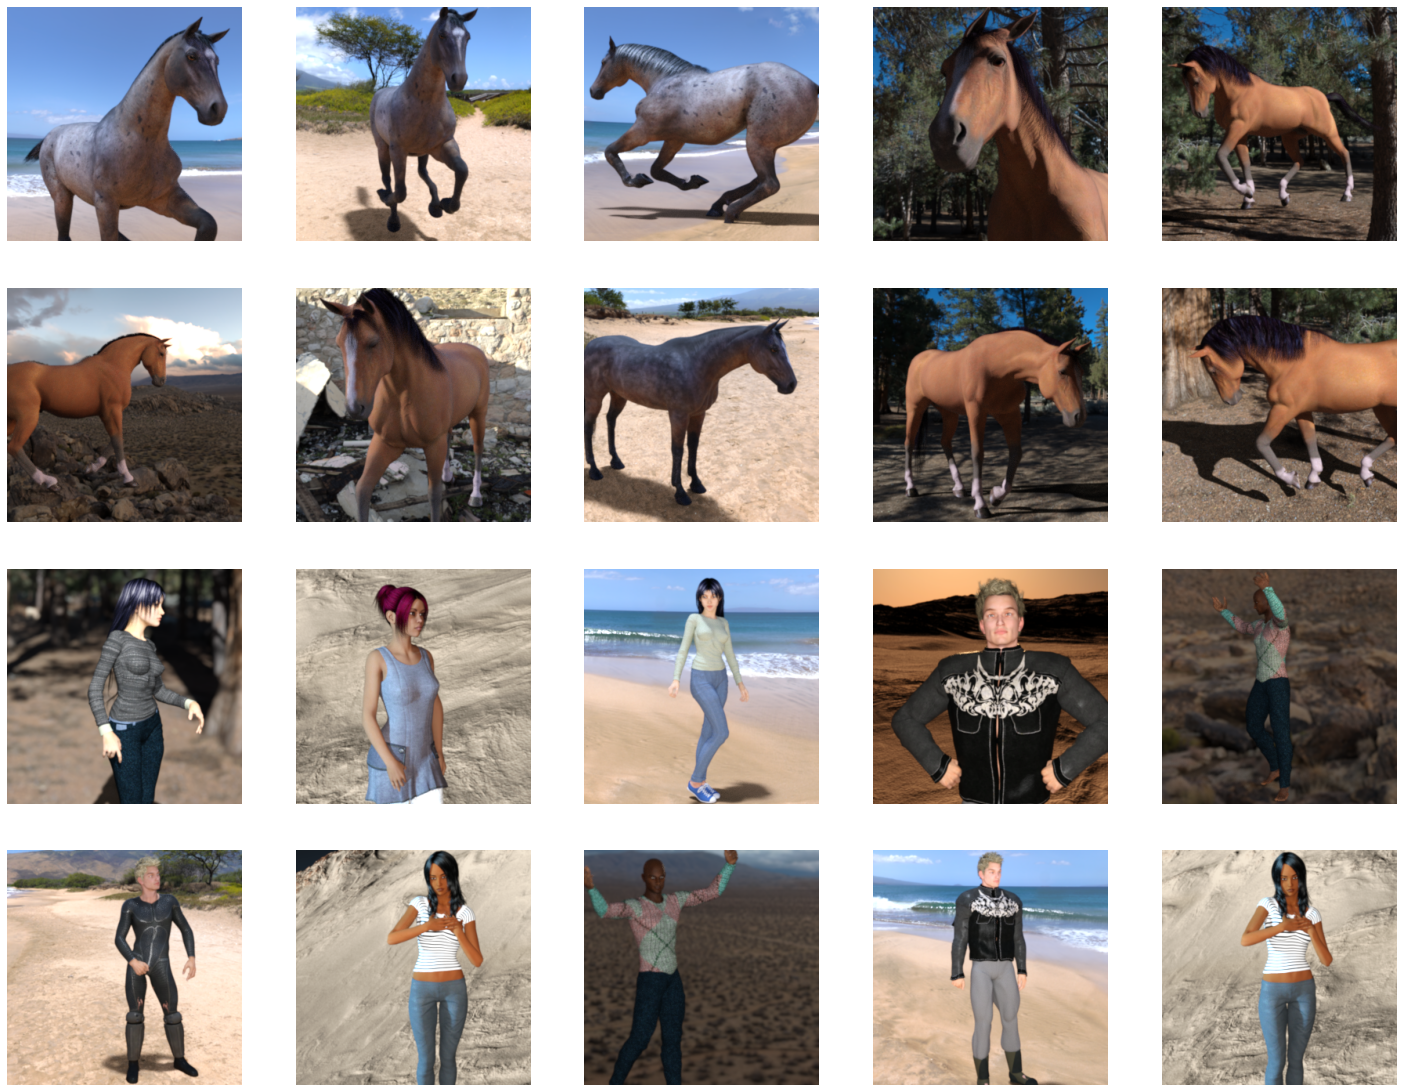

In [ ]:
import matplotlib.image as mpimg

# plotting the images od shape 5x5
n_rows = 5
n_columns = 5

# idx for iterating over the images
pic_ind = 0

fig = plt.gcf() # get current figure (if no current figure exists then a new one is created using figure())
fig.set_size_inches(n_columns*5, n_rows*5)

# get the path for the figures
next_horse_pic = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_ind:pic_ind+10]]
next_human_pic = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_ind:pic_ind+10]]

for i, img_path in enumerate(next_horse_pic+next_human_pic):
  plt.subplot(n_rows, n_columns, i+1)
  plt.axis(False)
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Building the model

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential([# First Convolution layer
                             tf.keras.layers.Conv2D(16, (3, 3), activation=tf.nn.relu, input_shape=(300, 300, 3)),
                             tf.keras.layers.MaxPool2D(2, 2),
                             # Second Convolution layer
                             tf.keras.layers.Conv2D(32, (3, 3), activation=tf.nn.relu),
                             tf.keras.layers.MaxPool2D(2, 2),
                             # Third Convolution layer
                             tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
                             tf.keras.layers.MaxPool2D(2, 2),
                             # Fourth Convolution layer
                             tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
                             tf.keras.layers.MaxPool2D(2, 2),
                             # Fifth Convolution layer
                             tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
                             tf.keras.layers.MaxPool2D(2, 2),
                             # Flatten and feed into DNN
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation=tf.nn.relu),
                             tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

## Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(1/255)
validation_datagen = ImageDataGenerator(1/255)

train_generator = train_datagen.flow_from_directory('/tmp/horse-or-human',
                                                    target_size=(300, 300),
                                                    batch_size=128,
                                                    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory('/tmp/validation-horse-or-human',
                                                              target_size=(300, 300),
                                                              batch_size=32,
                                                              class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8
)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/15
8/8 [==============================] - 8s 918ms/step - loss: 16.3951 - accuracy: 0.5780 - val_loss: 1.2317 - val_accuracy: 0.5117
Epoch 2/15
8/8 [==============================] - 7s 925ms/step - loss: 0.3647 - accuracy: 0.8319 - val_loss: 0.3472 - val_accuracy: 0.8594
Epoch 3/15
8/8 [==============================] - 7s 873ms/step - loss: 0.2408 - accuracy: 0.8921 - val_loss: 2.1401 - val_accuracy: 0.5000
Epoch 4/15
8/8 [==============================] - 7s 868ms/step - loss: 2.0572 - accuracy: 0.6410 - val_loss: 0.6983 - val_accuracy: 0.7305
Epoch 5/15
8/8 [==============================] - 7s 865ms/step - loss: 0.1532 - accuracy: 0.9536 - val_loss: 0.9757 - val_accuracy: 0.7969
Epoch 6/15
8/8 [==============================] - 7s 967ms/step - loss: 0.0793 - accuracy: 0.9776 - val_loss: 0.7937 - val_accuracy: 0.8594
Epoch 7/15
8/8 [==============================] - 7s 866ms/step - loss: 0.1434 - accuracy: 0.9412 - val_loss: 0.9386 - val_accuracy: 0.8203
Epoch 8/15
8/8 [===

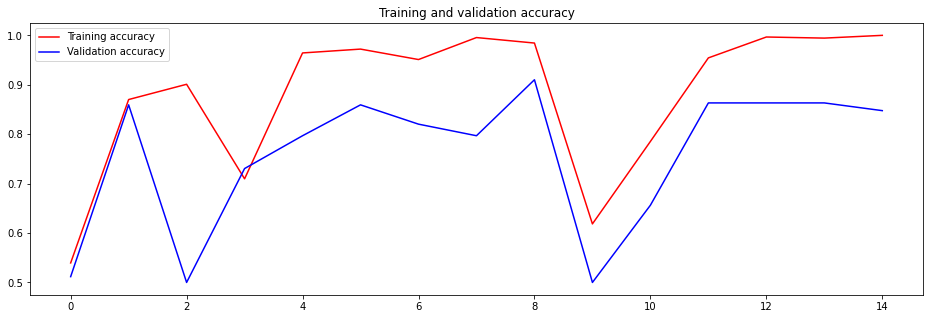

<Figure size 432x288 with 0 Axes>

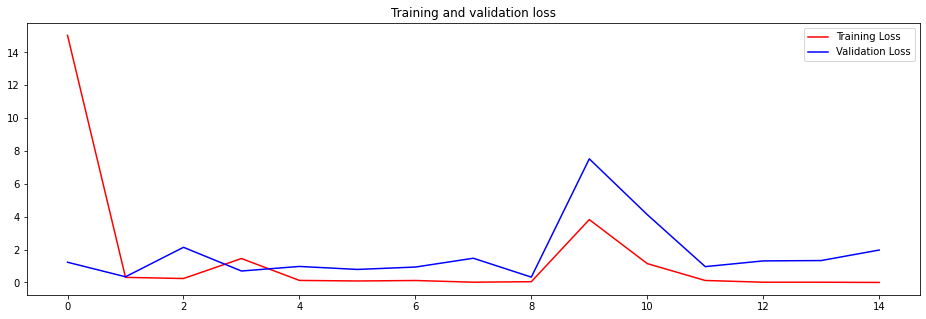

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(16, 5))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.figure(figsize=(16, 5))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Visulaizing the intermideiate Representations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


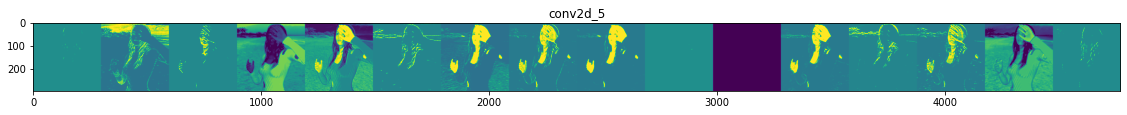

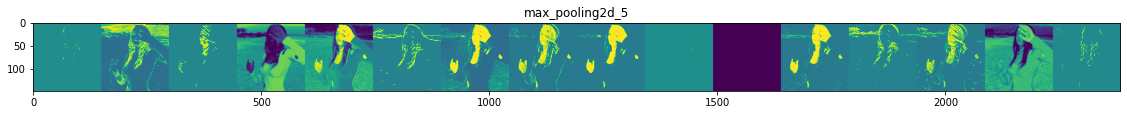

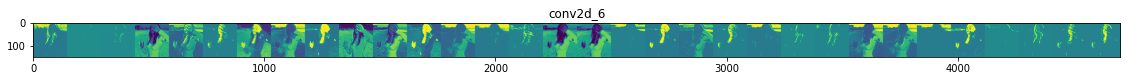

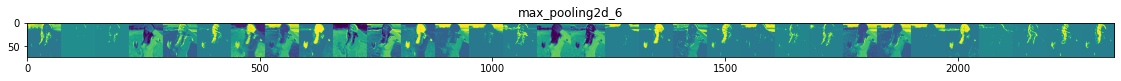

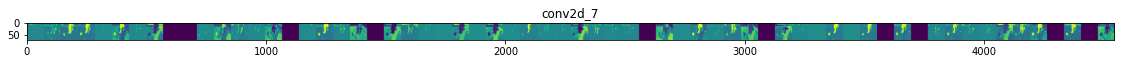

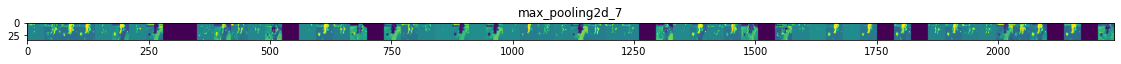

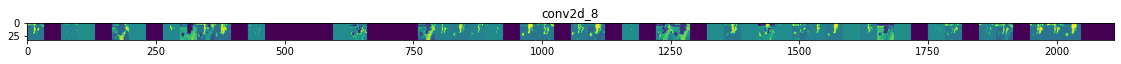

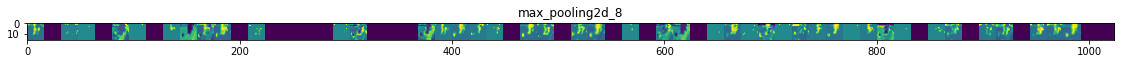

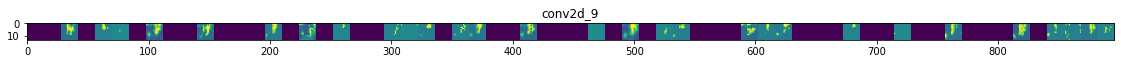

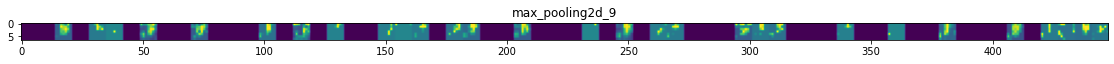

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing import image

layers_outputs = [layer.output for layer in model.layers]
visulaization_model = tf.keras.models.Model(inputs=model.inputs, outputs=layers_outputs)

# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files+human_img_files)

img = image.load_img(img_path, target_size=(300, 300))
x = image.img_to_array(img) # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape) # Numpy array with shape (1, 300, 300, 3)

# Rescale
x = x/255

successive_feature_maps = visulaization_model.predict(x)

layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape)==4:
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size*n_features))
    
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x = x -x.mean()
      x = x/x.std()
      x = x*64 + 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i*size : (i+1)*size] = x

    scale = 20. / n_features 
    plt.figure(figsize=(scale*n_features, scale))
    plt.grid(False)
    plt.title(layer_name)
    plt.imshow(display_grid)

## Running the model

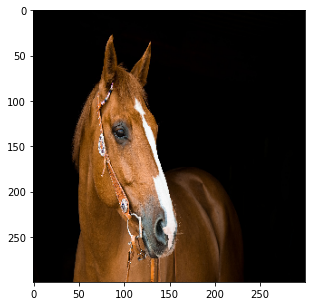

horse-3390256_1920.jpg is a horse


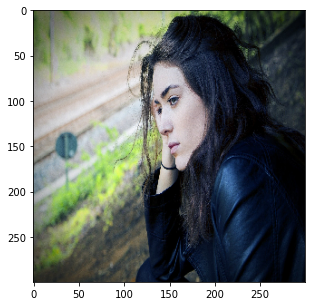

woman-918896_1920.jpg is a human


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

#uploaded = files.upload()


for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn 
  img = image.load_img(path, target_size=(300, 300))
  plt.figure(figsize=(5, 5))
  plt.imshow(img)
  plt.show()
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  #print(classes[0])
  if classes[0]>0.5:
    print(fn+' is a human')
  else:
    print(fn+' is a horse')